___
# Ciência dos Dados - PROJETO 1

# Augusto Franco de Paula
___

## Até onde a quantidade de moradores em um domicílio afeta na perda de peso dos mesmos?

___
### Neste projeto será abordado a relação entre renda per capita, perda de peso por falta de alimentos e quantidades de moradores por domicílios.

___
### Análise e Resultados

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Augusto\Desktop\CienciadosDados


In [28]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
base09 = pd.read_csv('DOM2009.csv',sep=',')
base13 = pd.read_csv('DOM2013.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [29]:
novabase09 = base09.loc[:,['UF', 'V0106','V0218', 'V2120', 'V4622']]
novabase13 = base13.loc[base13.V4621<500000,['UF', 'V0105','V0218', 'V2134', 'V4621']]


### Na célula a cima foram escolhidas as variáveis que serão utilizadas. Em sequência, temos: Estado; quantidade de moradores por domicílio; descarte de lixo; perda de peso e renda per capita. Obs.: foram utilizados dois anos: 2009 e 2013.

In [39]:
#Tabela de 2009
novabase09.V4622 = novabase09.V4622.astype('category')
novabase09.V4622.cat.categories = ('nenhuma', 'ate 1/4', 'de 1/4 ate 1/2', 'de 1/2 ate 1', 'de 1 ate 2', 'de 2 ate 3', 'de 3 ate 5', 'mais de 5','sem declaração')

novabase09.UF = novabase09.UF.astype('category')
novabase09.UF.cat.categories = ('rondonia', 'acre', 'amazonas', 'roraima', 'para', 'amapa', 'tocantins', 'maranhao', 'piaui', 'ceara', 'rio grande do norte', 'paraiba', 'pernambuco', 'alagoas','sergipe','bahia', 'minas gerais', 'espirito santo', 'rio de janeiro', 'sao paulo', 'parana','santa catarina','rio grande do sul', 'mato grosso do sul', 'mato grosso', 'goias', 'DF')

novabase09.V2120 = novabase09.V2120.astype('category')
novabase09.V2120.cat.categories = ('muito', 'medio', 'pouco')

novabase09.V0218 = novabase09.V0218.astype('category')
novabase09.V0218.cat.categories = ('coletado diretamente', 'coletado indiretamente', 'queimado', 'descarte em terreno baldio', 'descarte em rio ou mar', 'outro destino' )



#Tabela de 2013
V4621_cat = pd.cut(novabase13.V4621, bins=9)
faixa = (0,197,394, 788, 1576, 2364, 3152, 3940, 50000)
V4621_cat = pd.cut(novabase13.V4621, bins=faixa)
V4621_cat.value_counts(sort=False, normalize=True)*100

novabase13.UF = novabase13.UF.astype('category')
novabase13.UF.cat.categories = ('rondonia', 'acre', 'amazonas', 'roraima', 'para', 'amapa', 'tocantins', 'maranhao', 'piaui', 'ceara', 'rio grande do norte', 'paraiba', 'pernambuco', 'alagoas','sergipe','bahia', 'minas gerais', 'espirito santo', 'rio de janeiro', 'sao paulo', 'parana','santa catarina','rio grande do sul', 'mato grosso do sul', 'mato grosso', 'goias', 'DF')

novabase13.V2134 = novabase13.V2134.astype('category')
novabase13.V2134.cat.categories = ('perdeu peso', 'não perdeu peso')





### No código a cima foi feita a categorização das variáveis como quantitativas ou qualitativas.

In [40]:
# Tabelas 2009
#print('Quantidade de moradores por domicilios:')
#a = novabase09.V0106.value_counts(sort=True)
#ap = novabase09.V0106.value_counts(True) * 100
#print(a,'\n')
#print("Quantidade em porcentagem")
#print(ap,'\n')

#print('Salarios per capita (frequencia):')
#b = novabase09.V4622.value_counts(sort=True)
#bp = novabase09.V4622.value_counts(True) * 100
#print(b,'\n')
#print("Quantidade em porcentagem")
#print(bp,'\n')

#print('A quantidade de peso perdido:')
#c = novabase09.V2120.value_counts(sort=True)
#cp = novabase09.V2120.value_counts(True) * 100
#print(c,'\n')
#print("Quantidade em porcentagem")
#print(cp,'\n')

#print('Forma de descarte do lixo:')
#d = novabase09.V0218.value_counts(sort=True)
#dp = novabase09.V0218.value_counts(True) * 100
#print(d,'\n')
#print("Quantidade em porcentagem")
#print(dp,'\n')


### Na célula a cima foi representada a quantidade absoluta e quantidade em porcentagem com o número de moradores por domicílio. Esta parte foi crucial para a formulação dos 'crosstabs' que virão a seguir, assim como para os gráficos e conclusões.

In [41]:
#2009
#Cruzando variaveis (quantidade de moradores & perda de peso)
ct1 = pd.crosstab(novabase09.V0106, novabase09.V2120, margins=True, normalize = 'index')
#Cruzando variaveis (renda per capita & descarte de lixo)
ct2 = pd.crosstab(novabase09.V4622, novabase09.V0218, margins=True, normalize = 'index')

#Cruzando variaveis (renda per capita & quantidade de moradores)
ct3 = pd.crosstab(novabase09.V0106, novabase09.V4622, margins=True, normalize = 'index')

#Cruzando variaveis (estado & descarte de lixo )
ct4 = pd.crosstab(novabase09.UF, novabase09.V0218,  margins=True, normalize = 'index')

#Cruzando variaveis (estado & perda de peso)
ct5 =  pd.crosstab(novabase09.UF, novabase09.V2120,  margins=True, normalize = 'index')


#2013
#Cruzando variaveis (quantidade de moradores & perda de peso)
d1 = pd.crosstab(novabase13.V0105, novabase13.V2134, margins=True, normalize = 'index')

#Cruzando variaveis (renda per capita & quantidade de moradores)
d3 = pd.crosstab(novabase13.V0105, V4621_cat, margins=True, normalize = 'index')

### No código a cima foram definidas as crosstabs (cruzamento de variáveis). Foram utilizadas apenas as crosstabs CT1; CT2; D1 e D3.

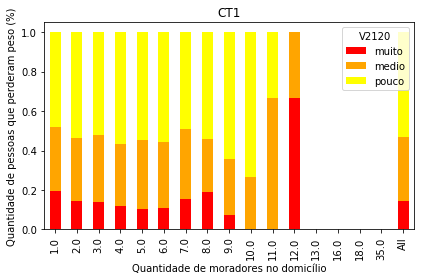

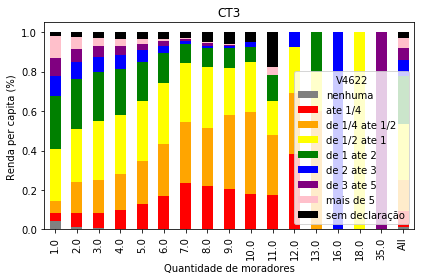

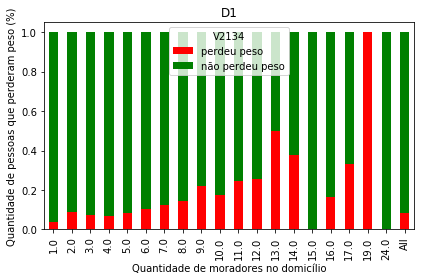

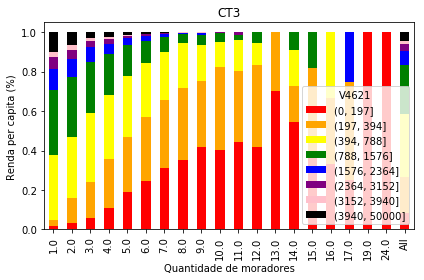

In [42]:
#2009
#Gráficos sobre variáveis cruzadas:
ct1.plot(kind='bar', color=('red', 'orange','yellow'), stacked = True)
plt.title('CT1')
plt.xlabel('Quantidade de moradores no domicílio')
plt.ylabel('Quantidade de pessoas que perderam peso (%)')
plt.tight_layout()
plt.show()


#ct2.plot(kind='bar', color=('green', 'yellow','red', 'brown', 'blue', 'black'), stacked = True)
#plt.title('CT2')
#plt.xlabel('Renda per capita')
#plt.ylabel('Descarte de lixo (%)')
#plt.tight_layout()


ct3.plot(kind='bar', color=('gray', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'black'), stacked = True)
plt.title('CT3')
plt.xlabel('Quantidade de moradores')
plt.ylabel('Renda per capita (%)')
plt.tight_layout()
plt.show()

d1.plot(kind='bar', color=('red','green'), stacked = True)
plt.title('D1')
plt.xlabel('Quantidade de moradores no domicílio')
plt.ylabel('Quantidade de pessoas que perderam peso (%)')
plt.tight_layout()
plt.show()

d3.plot(kind='bar', color=('red','orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'black'), stacked = True)
plt.title('D3')
plt.xlabel('Quantidade de moradores')
plt.ylabel('Renda per capita (%)')
plt.tight_layout()
plt.show()

#c3.plot(kind='bar', color=('grey', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'black'), stacked = True)
#plt.title('C3')
#plt.xlabel('Quantidade de moradores')
#plt.ylabel('Renda per capita (%)')
#plt.tight_layout()
#plt.show()

#ct4.plot(kind='bar', color=('green', 'yellow','red', 'brown', 'blue', 'black'), stacked = True)
#plt.title('CT4')
#plt.xlabel('Estado')
#plt.ylabel('Descarte de lixo (%)')
#plt.tight_layout()
#plt.show()

#ct5.plot(kind='bar', color=('red', 'yellow', 'green'), stacked = True)
#plt.title('CT5')
#plt.xlabel('Estado')
#plt.ylabel('Quantidade de pessoas que perderam peso (%)')
#plt.tight_layout()
#plt.show()

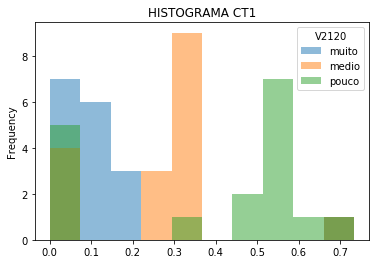

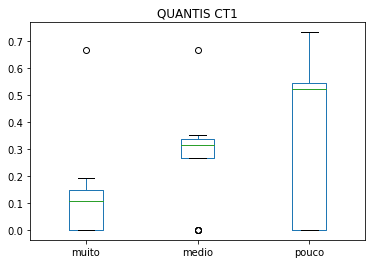

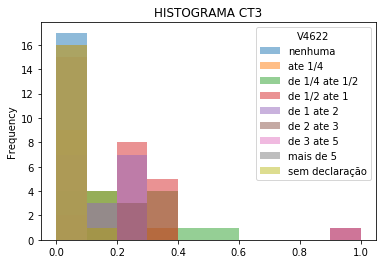

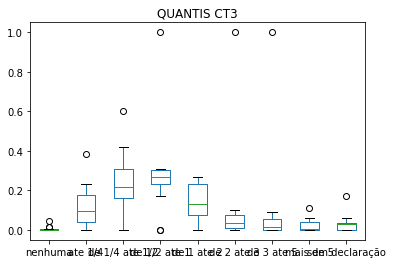

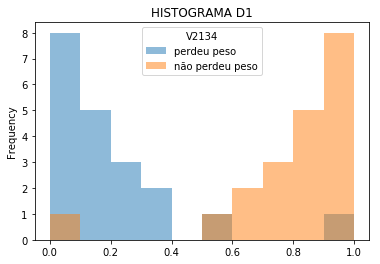

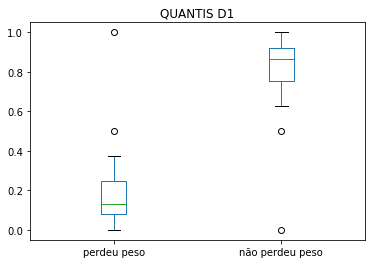

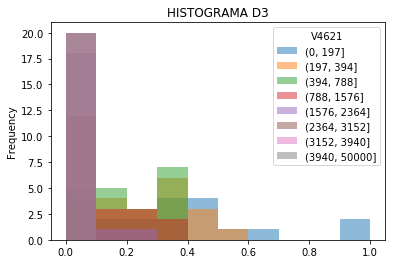

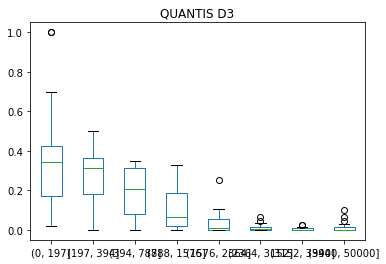

In [50]:
ct1.plot(kind='hist', alpha=0.5)
plt.title('HISTOGRAMA CT1')


ct1.plot(kind='box')
plt.title('QUANTIS CT1')


ct3.plot(kind='hist', alpha=0.5)
plt.title('HISTOGRAMA CT3')


ct3.plot(kind='box')
plt.title('QUANTIS CT3')


d1.plot(kind='hist', alpha=0.5)
plt.title('HISTOGRAMA D1')


d1.plot(kind='box')
plt.title('QUANTIS D1')


d3.plot(kind='hist', alpha=0.5)
plt.title('HISTOGRAMA D3')


d3.plot(kind='box')
plt.title('QUANTIS D3')


___
# Conclusão 

### Após analisar o CT1 (2009), percebe-se um certo equilíbrio entre perda de peso e quantidade de moradores no domicílio. Porém, é válido ressaltar que em domicílios com 5 ou 6 pessoas, há quase metade da porcentagem de domicílios de 1 morador que já perdeu muito peso. 
### Em uma segunda análise, percebemos que CT3 (2009) aponta que quase 5% dos domicílios que possuem apenas 1 morador não possui nenhuma renda. Tal fato explica a elevada frequência (em CT1) dos domicílios de 1 morador perderem muito peso.
### Já em D1 percebe-se uma proporcionalidade, isto é, quanto maior o número de moradores no domicílio, maior é a porcentagem de pessoas que perderam peso.
### Percebe-se que os intervalos da renda percapta são os mesmos. Com um detalhe: em CT1 foi abordado um gráfico qualitativo ('nenhuma', 'ate 1/4', 'de 1/4 ate 1/2', 'de 1/2 ate 1', 'de 1 ate 2', 'de 2 ate 3', 'de 3 ate 5', 'mais de 5','sem declaração'), enquanto em D3 foi utilizado uma variável quantitativa ('0,197,394, 788, 1576, 2364, 3152, 3940, 7880').
### Para justificar D1, temos D3. Conclui-se, portanto, que em 2015 os domicílios com 'nenhuma' renda per capita praticamente foi zerado em domicílios com um morador. 
### Em uma outra análise, é verificável que quanto mais moradores em um domicílio, menor a renda per capita (%). Este fato explica a proporcionalidade entre perda de peso e quantidade de moradores em um domicílio (D1).